In [17]:
import wbdata
import pandas as pd
import datetime

In [29]:
import wbdata
import pandas as pd
from datetime import datetime

# Define date range
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 12, 31)

# Debt indicator: External debt stocks (% of GDP)
indicator = {"DT.DOD.DECT.GN.ZS": "External Debt to GDP"}

# Fetch data for multiple countries including the USA
countries = ["USA", "CHN", "IND", "BRA", "RUS", "ZAF", "JPN"]  # Add more countries as needed
debt_data = wbdata.get_dataframe(indicator, country=countries)

# Reset index for easier manipulation
debt_data.reset_index(inplace=True)

# Save data for processing
debt_data.to_csv("debt_data.csv", index=False)
print(debt_data.head())

  country  date  External Debt to GDP
0  Brazil  2023                   NaN
1  Brazil  2022             31.111702
2  Brazil  2021             35.775071
3  Brazil  2020             38.005686
4  Brazil  2019             31.196414


In [50]:
debt_data

,country,date,External Debt to GDP,Year,Debt Growth Rate (%)
0,Brazil,2023,NaN,1970,NaN
1,Brazil,2022,31.111702,1970,NaN
2,Brazil,2021,35.775071,1970,14.989115
3,Brazil,2020,38.005686,1970,6.235110
4,Brazil,2019,31.196414,1970,-17.916454
...,...,...,...,...,...
443,South Africa,1964,14.343011,1970,0.000000
444,South Africa,1963,14.343011,1970,0.000000
445,South Africa,1962,14.343011,1970,0.000000
446,South Africa,1961,14.343011,1970,0.000000


In [33]:
debt_data.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               448 non-null    object 
 1   date                  448 non-null    object 
 2   External Debt to GDP  189 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.6+ KB


In [34]:
# Load the collected data
debt_data = pd.read_csv("debt_data.csv")

# Check for missing values
print(debt_data.isnull().sum())

# Handle missing values (e.g., forward fill)
debt_data.fillna(method="ffill", inplace=True)

# Create a Year column for trend analysis
debt_data['Year'] = pd.to_datetime(debt_data['date']).dt.year

# Calculate debt growth rate for each country
debt_data['Debt Growth Rate (%)'] = debt_data.groupby('country')['External Debt to GDP'].pct_change() * 100

# Save processed data
debt_data.to_csv("processed_debt_data.csv", index=False)
print(debt_data.head())

country                   0
date                      0
External Debt to GDP    259
dtype: int64
  country  date  External Debt to GDP  Year  Debt Growth Rate (%)
0  Brazil  2023                   NaN  1970                   NaN
1  Brazil  2022             31.111702  1970                   NaN
2  Brazil  2021             35.775071  1970             14.989115
3  Brazil  2020             38.005686  1970              6.235110
4  Brazil  2019             31.196414  1970            -17.916454


C:\Users\hp\AppData\Local\Temp\ipykernel_13952\3428636536.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  debt_data.fillna(method="ffill", inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13952\3428636536.py:14: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  debt_data['Debt Growth Rate (%)'] = debt_data.groupby('country')['External Debt to GDP'].pct_change() * 100


  country  date  External Debt to GDP  Year  Debt Growth Rate (%)
0  Brazil  2023                   NaN  1970                   NaN
1  Brazil  2022             31.111702  1970                   NaN
2  Brazil  2021             35.775071  1970             14.989115
3  Brazil  2020             38.005686  1970              6.235110
4  Brazil  2019             31.196414  1970            -17.916454


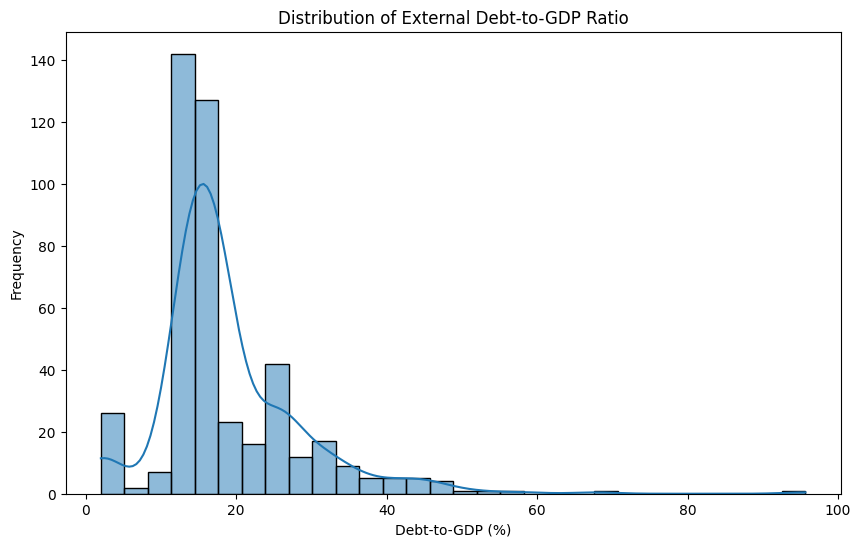

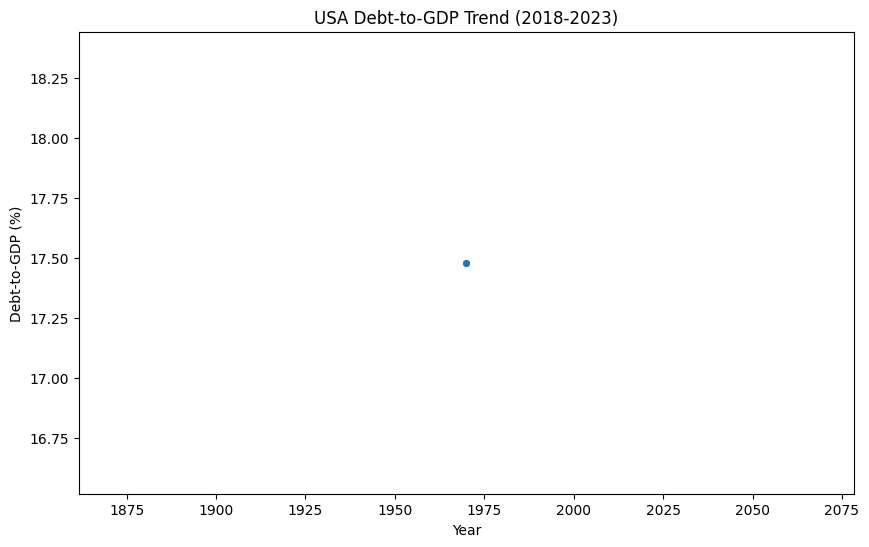

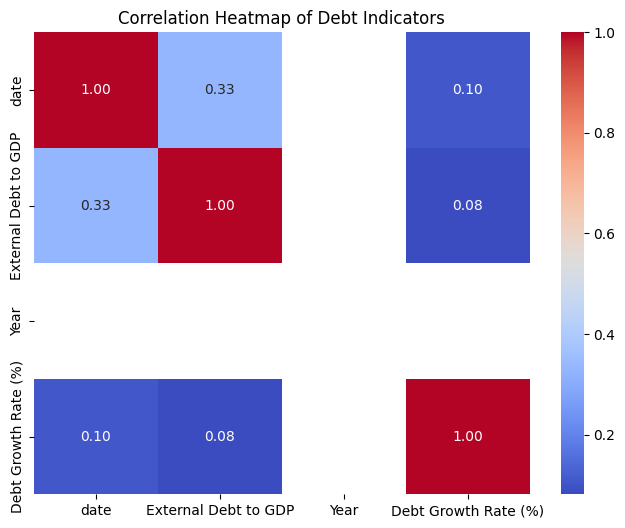

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
debt_data = pd.read_csv("processed_debt_data.csv")

# Check the structure of the data (debugging step)
print(debt_data.head())

# Distribution of Debt-to-GDP
plt.figure(figsize=(10, 6))
sns.histplot(debt_data['External Debt to GDP'], kde=True, bins=30)
plt.title("Distribution of External Debt-to-GDP Ratio")
plt.xlabel("Debt-to-GDP (%)")
plt.ylabel("Frequency")
plt.show()

# Trends over years for USA
# Ensure columns 'country' and 'Year' exist
if 'country' in debt_data.columns and 'Year' in debt_data.columns:
    usa_data = debt_data[debt_data['country'] == 'United States']
    if not usa_data.empty:
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Year', y='External Debt to GDP', data=usa_data, marker="o")
        plt.title("USA Debt-to-GDP Trend (2018-2023)")
        plt.xlabel("Year")
        plt.ylabel("Debt-to-GDP (%)")
        plt.show()
    else:
        print("No data available for the USA in the provided dataset.")
else:
    print("The dataset does not have required columns 'country' and 'Year'.")

# Correlation Heatmap
# Ensure numerical columns for correlation
numerical_cols = debt_data.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 1:
    corr_matrix = debt_data[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Debt Indicators")
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")

In [52]:
import wbdata

# Set the indicators you want to retrieve
indicators = {"DT.DOD.DECT.GN.ZS": "External Debt Stocks (% of GDP)"}

# Retrieve data for USA specifically
data = wbdata.get_dataframe(indicators, country="USA", convert_date=True)

print(data)


TypeError: got an unexpected keyword argument 'convert_date'